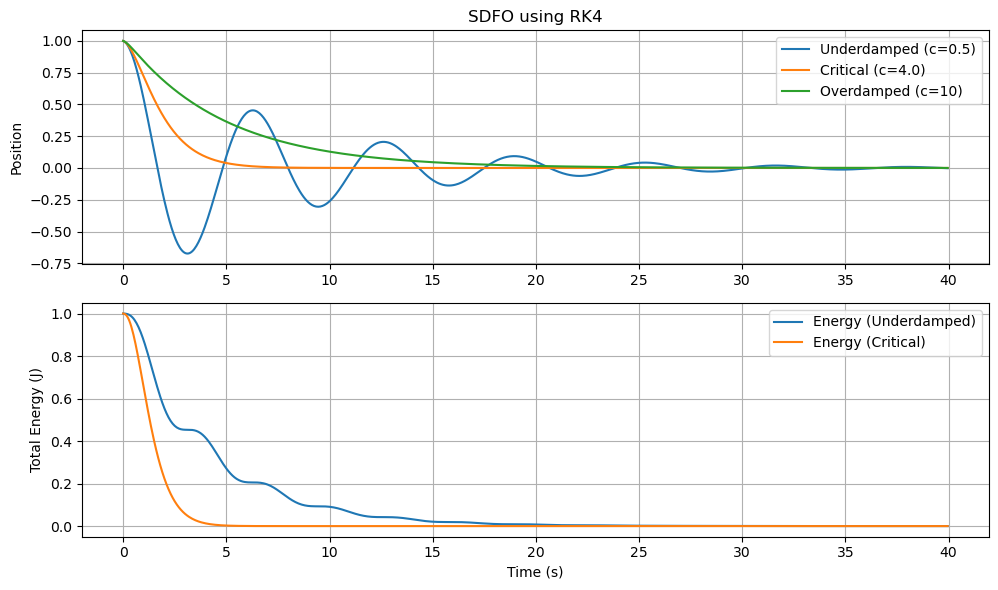

In [22]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

def vibration(m, k, c, initial_state, title,F0=0, omega=1.0):
    # Parameters
    delta_t = 0.05
    time = np.arange(0.0, 40.0, delta_t)
    
    # State-space Matrices
    A = np.array([[m, 0], [0, 1]])
    B = np.array([[c, k], [-1, 0]])
    A_inv = inv(A)
    
    y = np.array(initial_state, dtype=float)
    displacement = [] #to store displacement
    force = [] #to store force
    total_energy = [] #to store energy

    #force function
    def f(t):
        return np.array([F0 * np.cos(omega * t) if t <= 15 else 0.0, 0.0])

    #derivative function
    def G(y_state, t_step):
        return A_inv.dot(f(t_step) - B.dot(y_state))

    # Time-stepping (Runge-Kutta 4th order)
    for t in time:
        k1 = G(y, t)
        k2 = G(y + 0.5 * k1 * delta_t, t + 0.5 * delta_t)
        k3 = G(y + 0.5 * k2 * delta_t, t + 0.5 * delta_t)
        k4 = G(y + k3 * delta_t, t + delta_t)
        
        y = y + (delta_t / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
        
        # Calculations
        displacement.append(y[1])
        kinetic_en = 0.5 * m * y[0]**2
        potential_en = 0.5 * k * y[1]**2
        total_e =  kinetic_en + potential_en
        total_energy.append(total_e)

    return time, displacement, total_energy

# --- Running Comparisons ---
m_val, k_val = 2.0, 2.0
c_under = 0.5 #Under damping
c_crit = 2 * np.sqrt(m_val * k_val) # Critical damping
c_over = 10 #Over damping
initial_state = [0.0,1.0]

#Underdamped (c < c_crit)
t1, y1, e1 = vibration(m_val, k_val, c_under, initial_state, "Underdamped")

# Case 2: Critically Damped (c = c_crit)
t2, y2, e2 = vibration(m_val, k_val, c_crit, initial_state, "Critial")

# Case 3: Overdamped (c > c_crit)
t3, y3, e3 = vibration(m_val, k_val, c_over, initial_state, "Overdamped")

# --- Plotting Results ---
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t1, y1, label=f"Underdamped (c={c_under})")
plt.plot(t2, y2, label=f"Critical (c={c_crit})")
plt.plot(t3, y3, label=f"Overdamped (c={c_over})")
plt.title("SDFO using RK4")
plt.ylabel("Position")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t1, e1, label="Energy (Underdamped)")
plt.plot(t2, e2, label="Energy (Critical)")
plt.xlabel("Time (s)")
plt.ylabel("Total Energy (J)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()